In [336]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pyod.utils.data import generate_data
from pycaret.datasets import get_data
from pycaret.anomaly import *
mpl.rcParams['figure.dpi'] = 300

In [404]:
data = get_data('wholesale')

data.skew()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

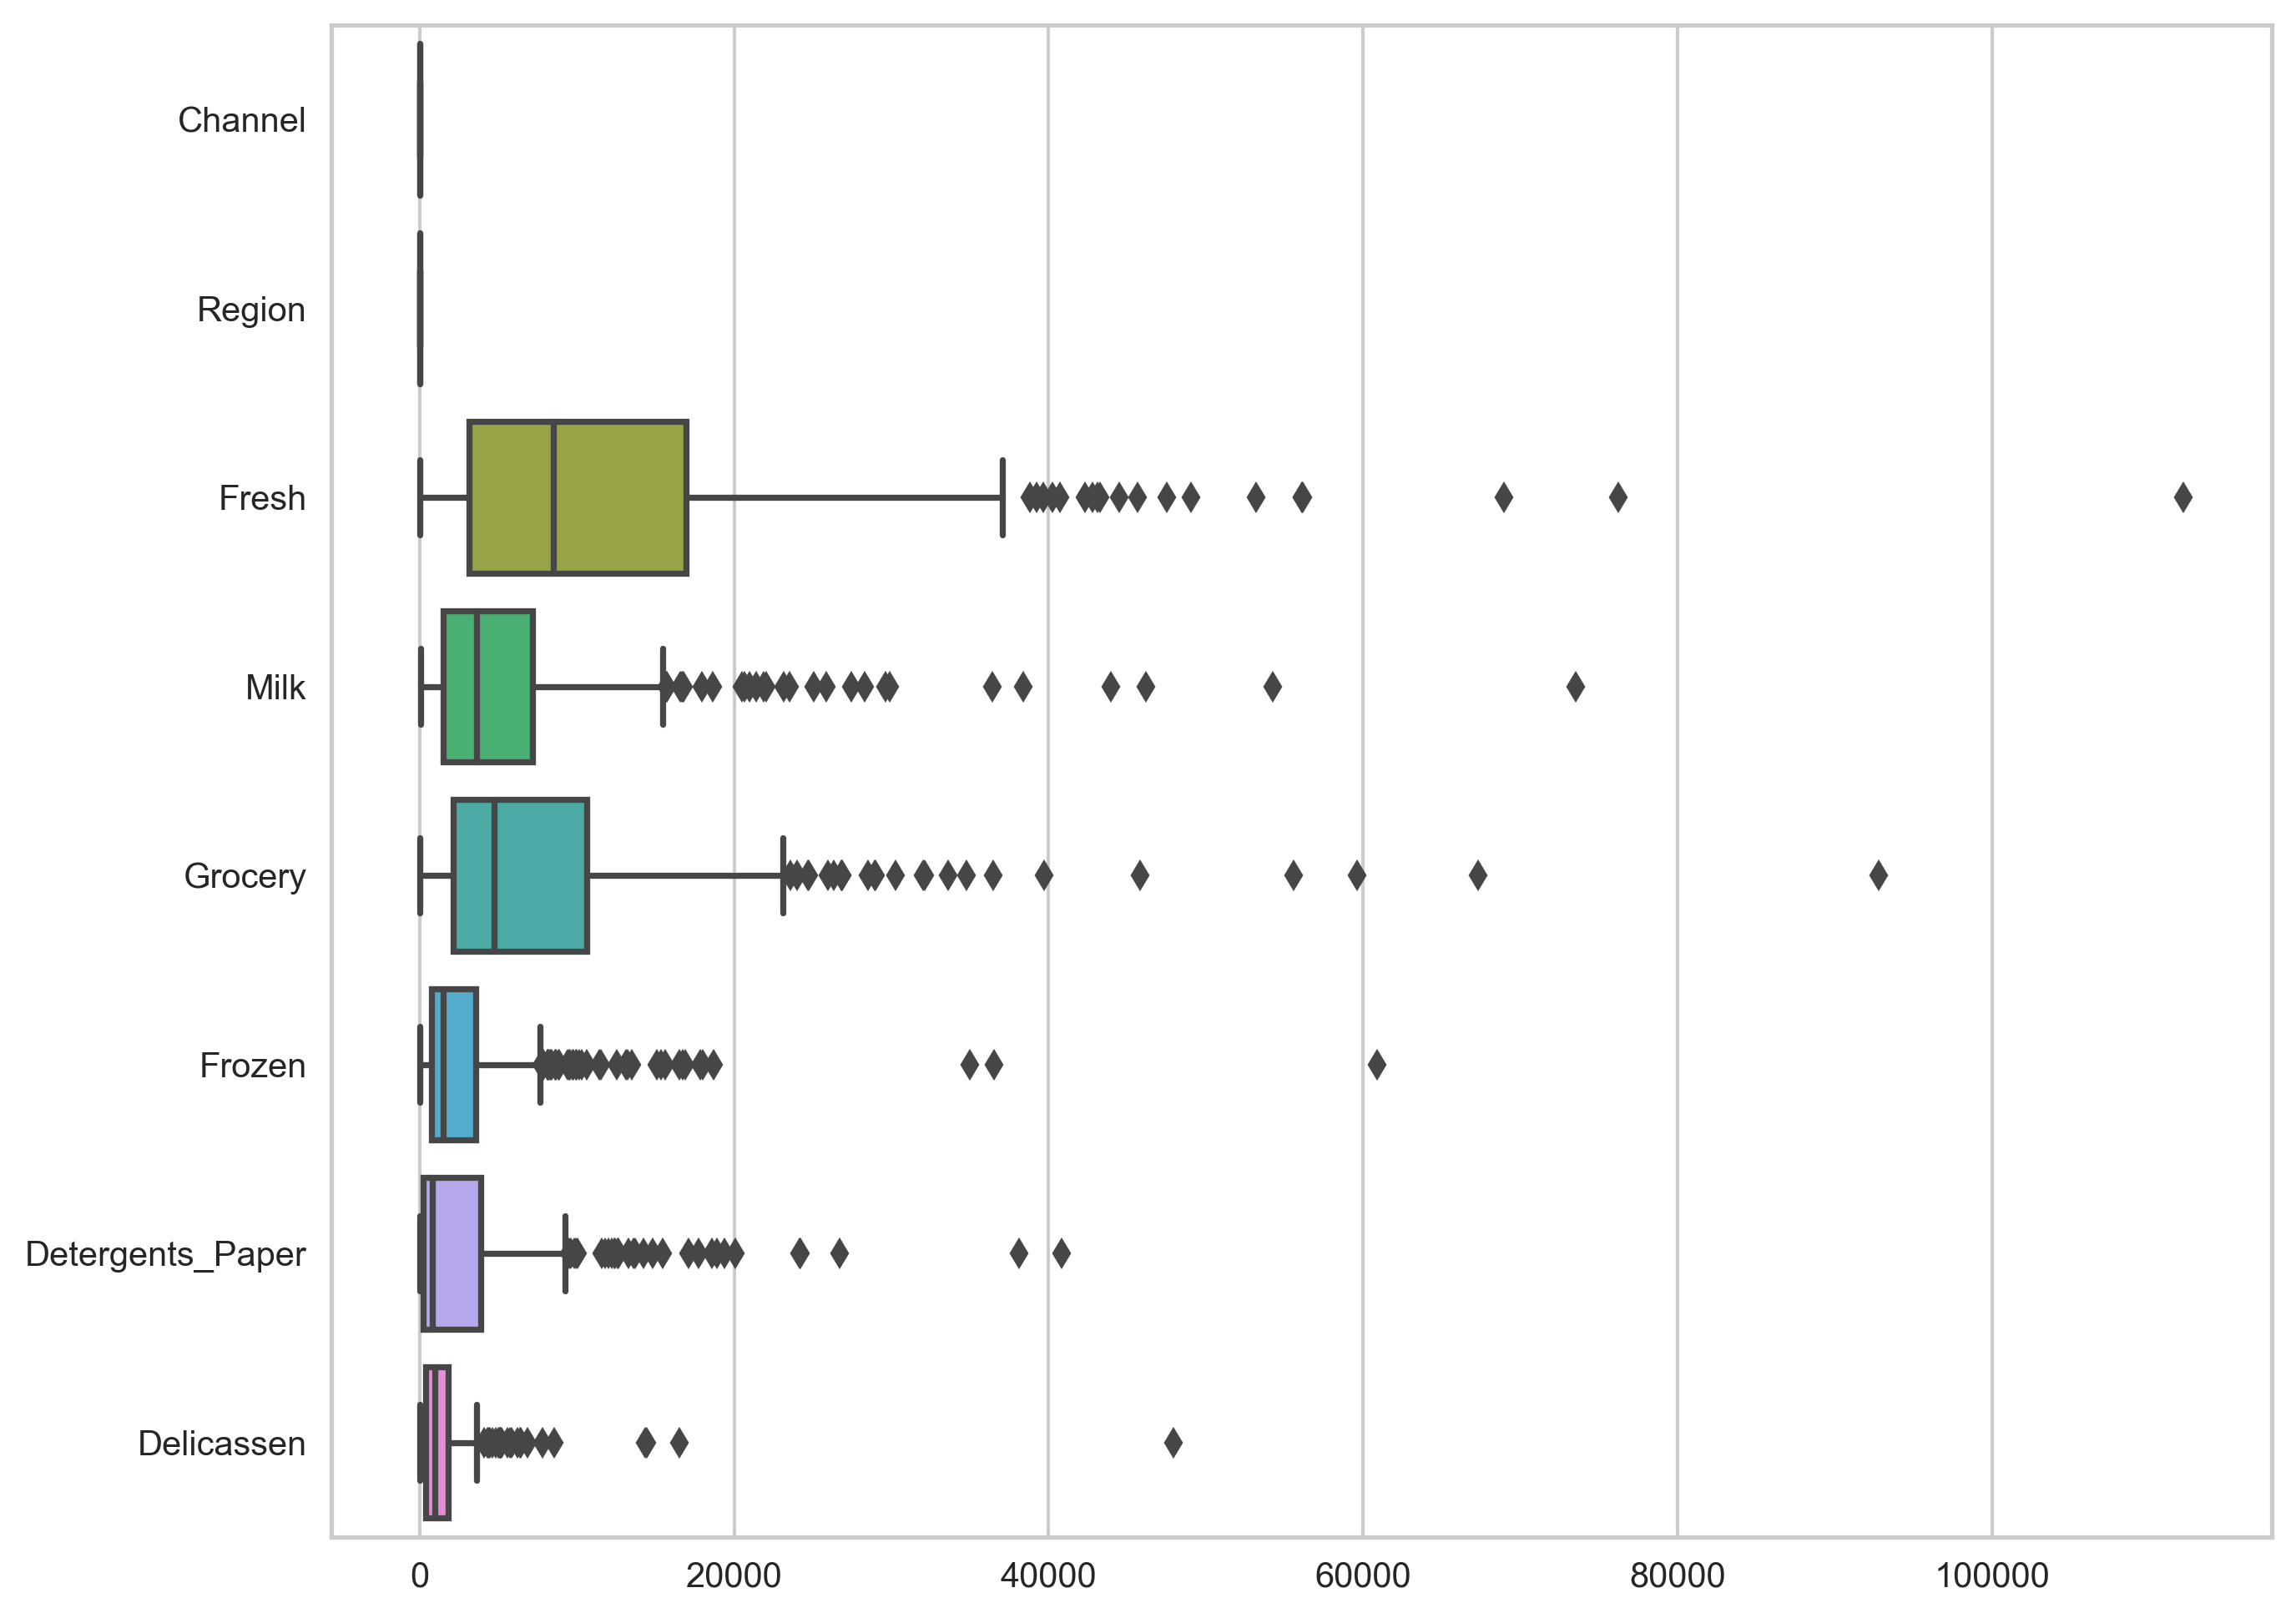

In [405]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data=data, orient='h', ax = ax)
plt.show()

In [406]:
anomaly = setup(data)

,Description,Value
0,session_id,2876
1,Original Data,"(440, 8)"
2,Missing Values,False
3,Numeric Features,6
4,Categorical Features,2
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(440, 11)"
9,CPU Jobs,-1


In [520]:
model = create_model('lof', fraction = 0.15)

data_ = assign_model(model)

data_inlier = data_.query('Anomaly == 0')

data_inlier.iloc[:,2:-2].skew().mean()

1.659324341486929

In [493]:
data_.iloc[:,2:-2].skew().mean()

5.148988182263967

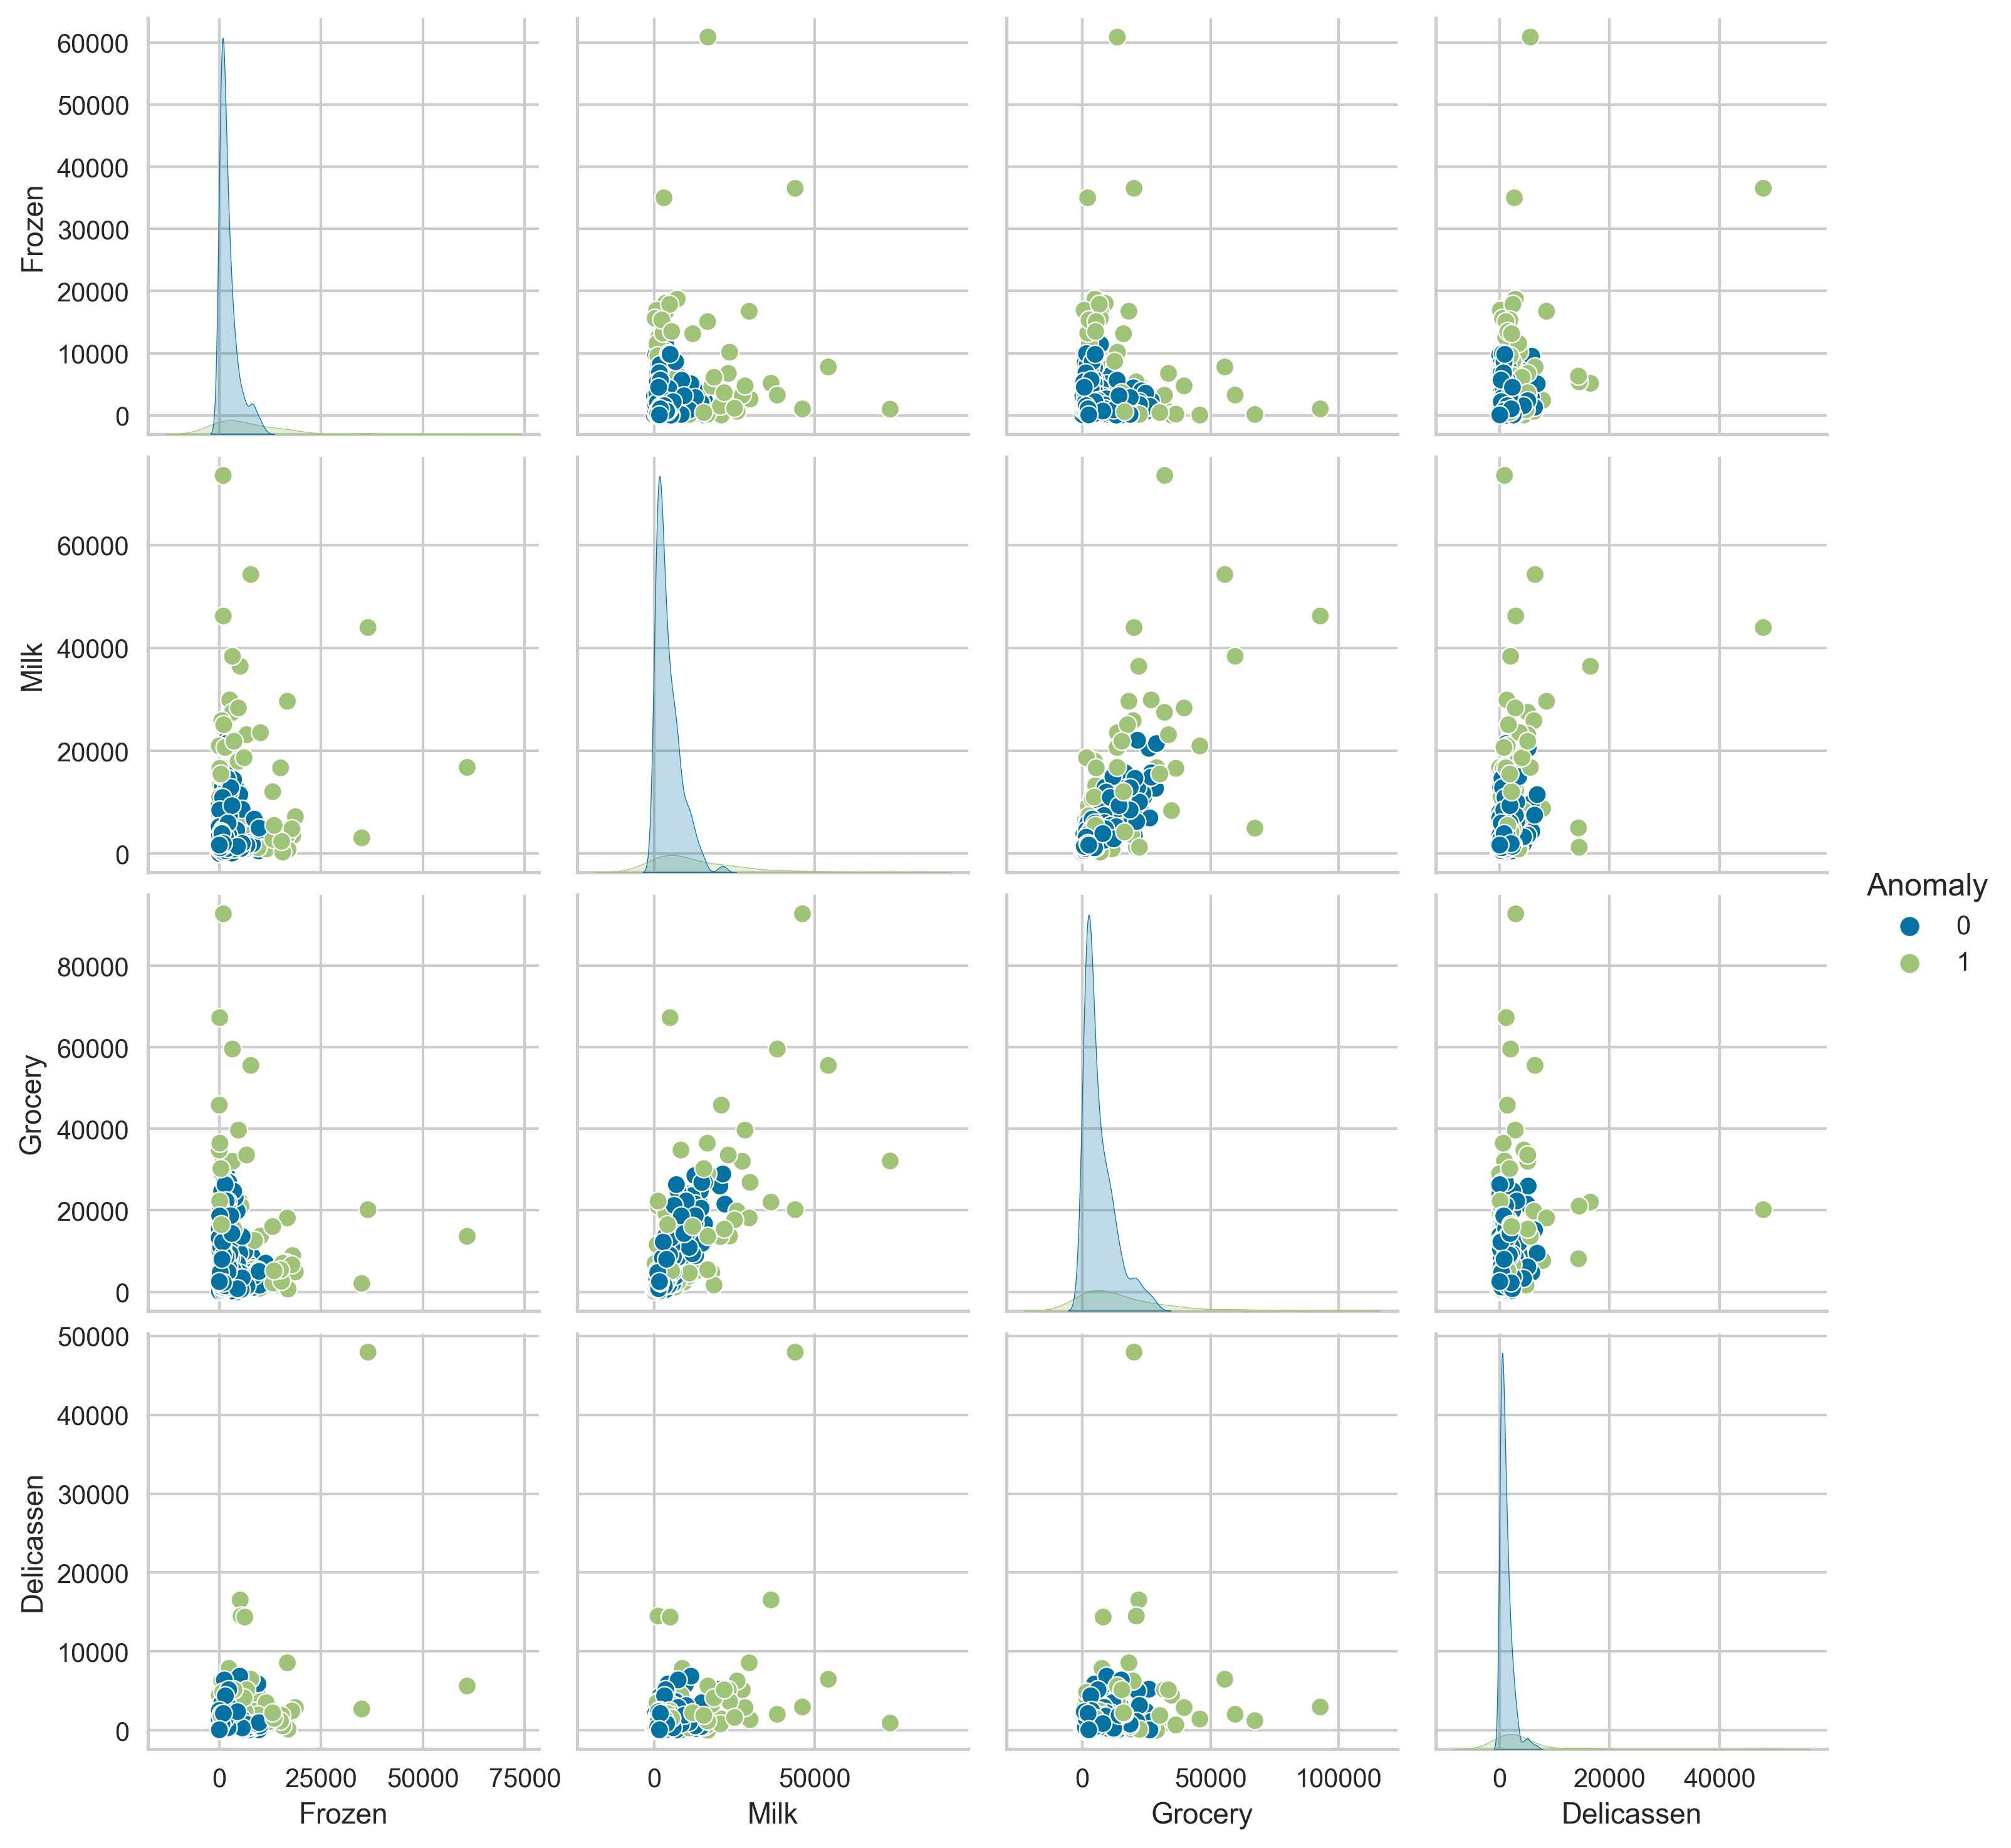

In [521]:
sns.pairplot(data_, vars = ['Frozen', 'Milk', 'Grocery', 'Delicassen'], hue='Anomaly')

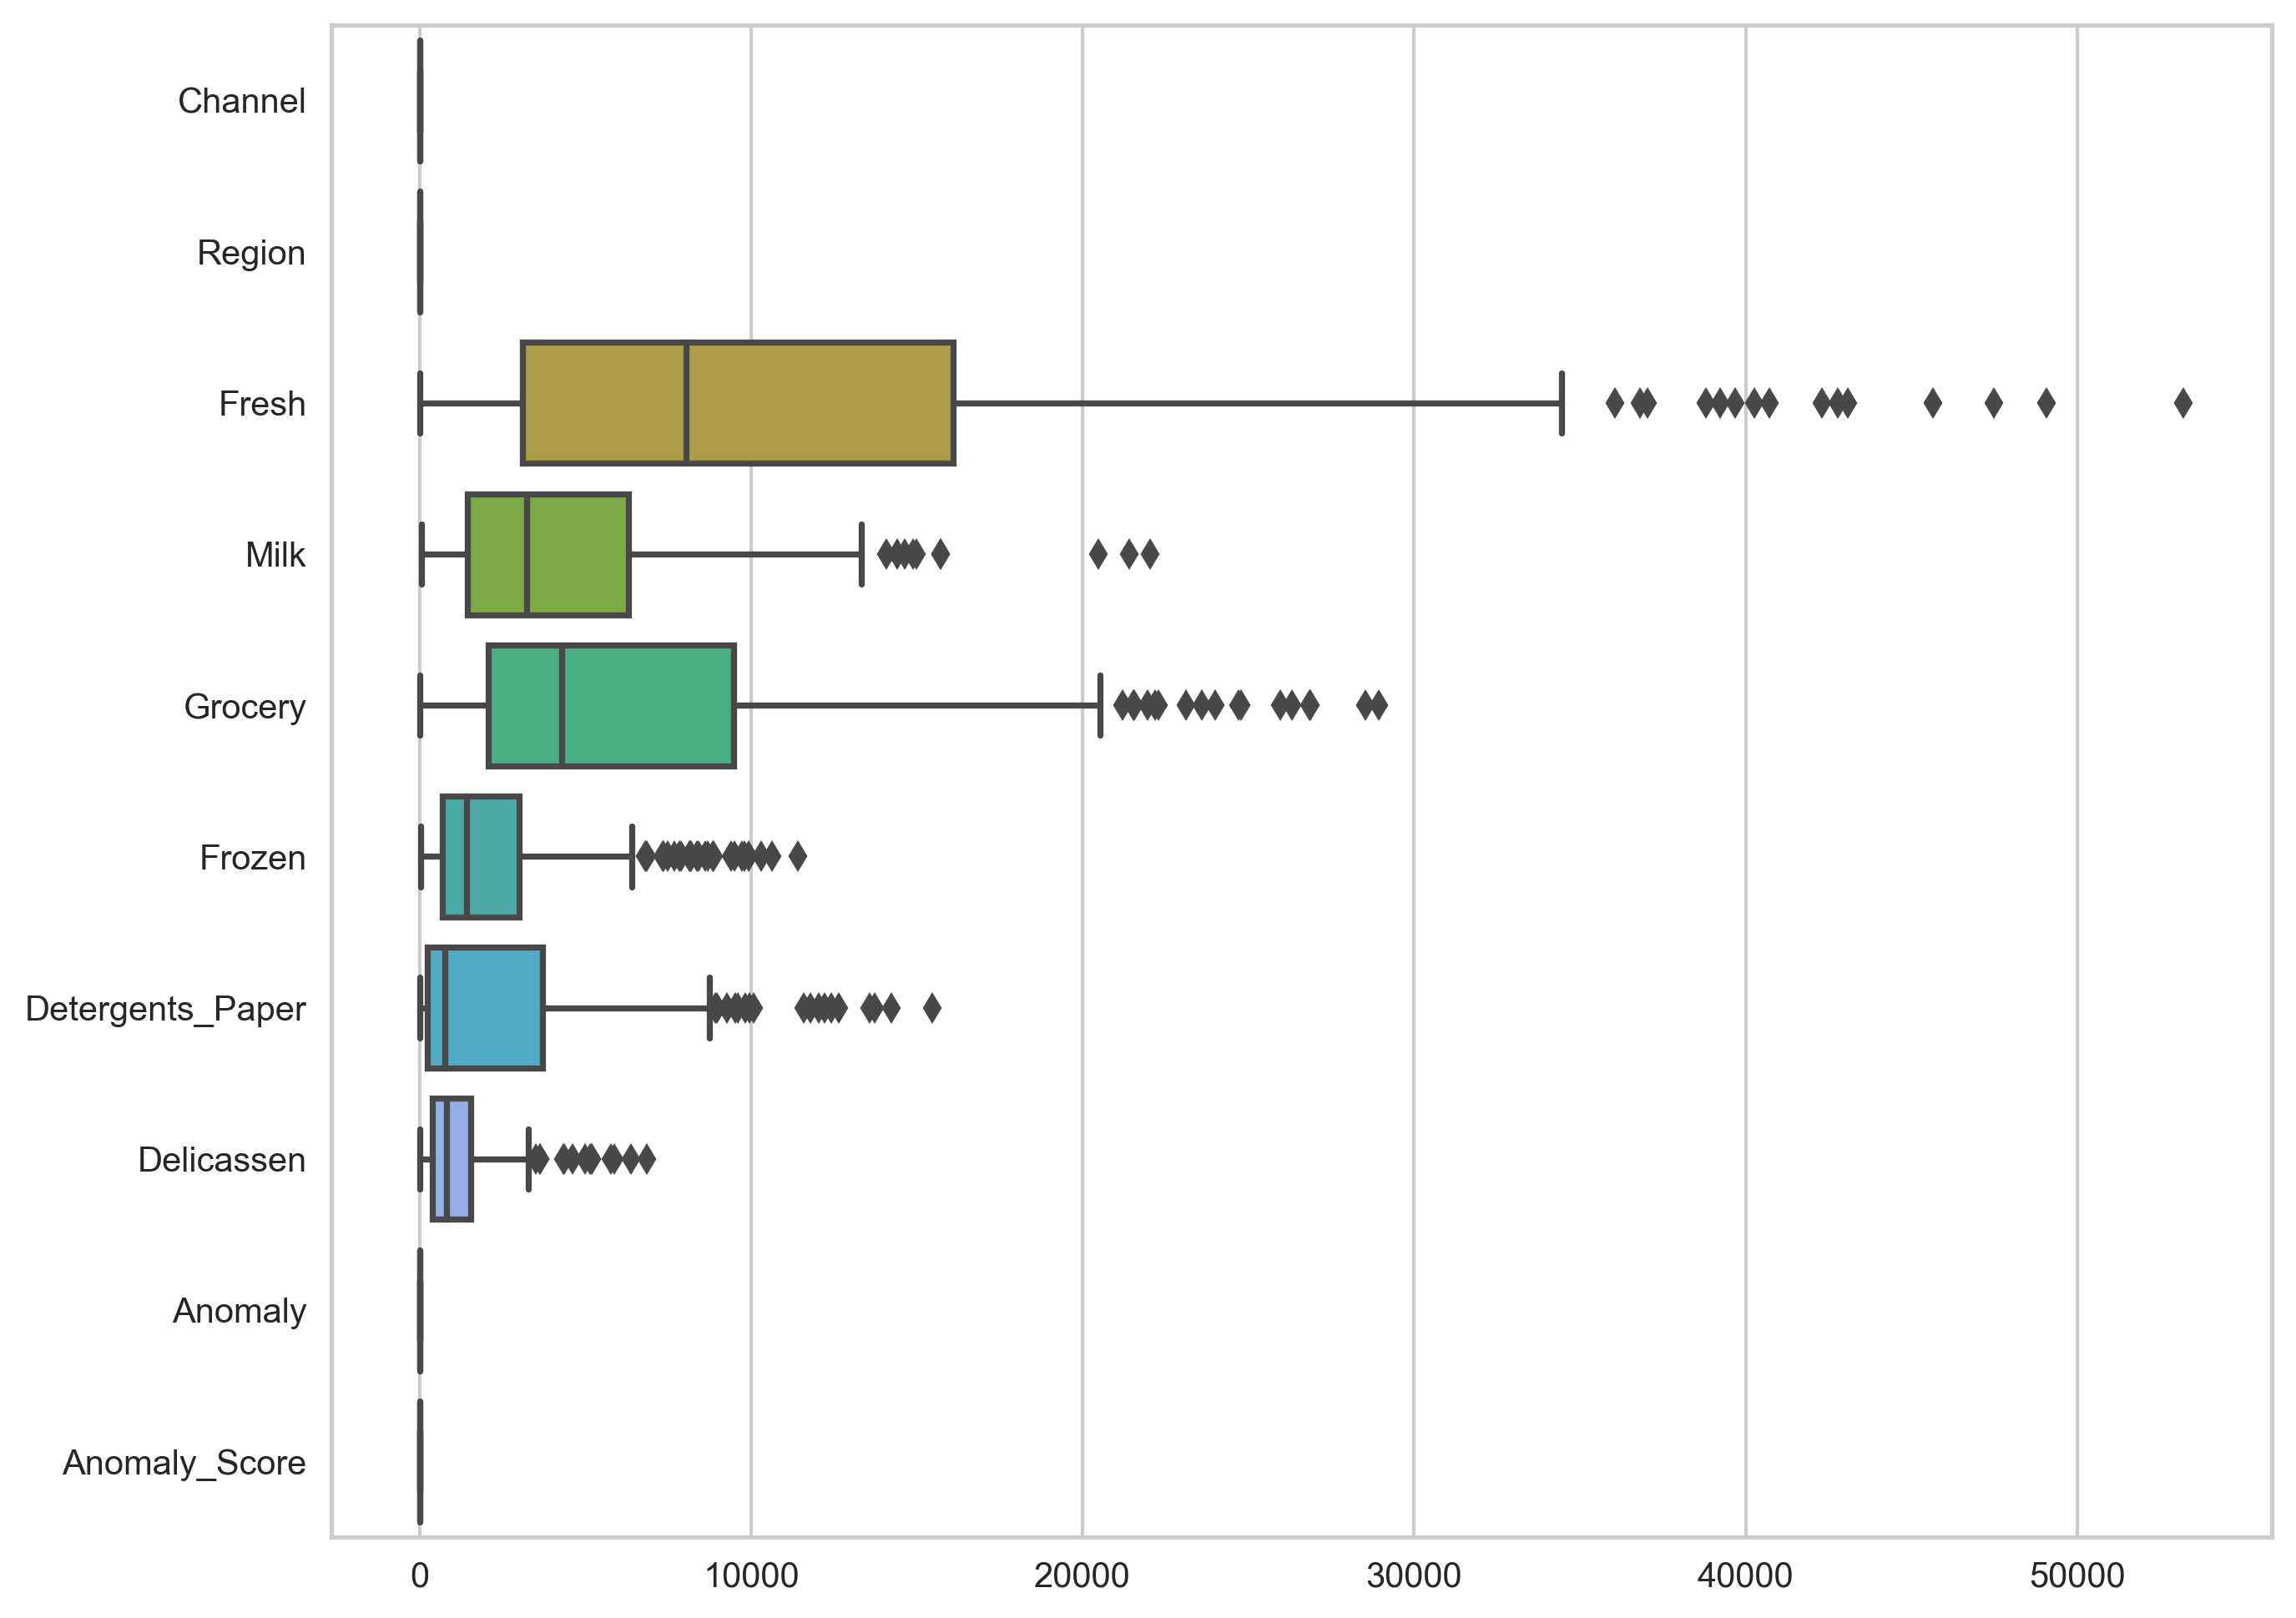

In [522]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data=data_.query('Anomaly == 0'), orient='h', ax = ax)
plt.show()

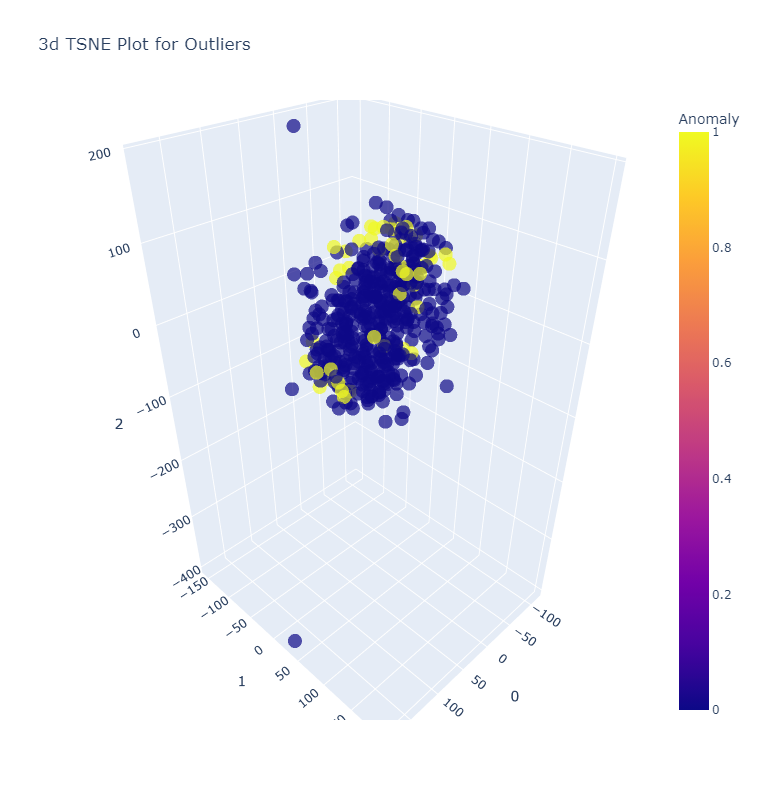

In [431]:
plot_model(model, 'tsne')